<a href="https://colab.research.google.com/github/nidhikumari319/KNN-and-PCA-Assignment/blob/main/KNN_and_PCA_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. What is K-Nearest Neighbors (KNN) and how does it work?


    ANS:

    KNN is a simple machine learning algorithm used for
    classification and regression. It works like this:

    You have some data points (examples) with labels
    (for classification) or values (for regression).

    When a new data point comes in, KNN looks at the K
    closest points to it.

    For classification, it takes a vote among those K
    neighbors and assigns the most common label.

    For regression, it takes the average of the values
    of the K neighbors.

    It’s like asking your closest friends for advice
    when making a decision!

2. What is the difference between KNN Classification and KNN Regression?


    ans:
    
    KNN Classification → Used when you need to predict a
    category (e.g., "dog" or "cat"). It looks at the labels
    of the nearest neighbors and picks the most common one.

    KNN Regression → Used when you need to predict a
    numerical value (e.g., predicting the price of a house).
    It takes the average of the closest values.

3. What is the role of the distance metric in KNN?



     ans:

      The distance metric helps KNN find the closest neighbors.
      Common ones are:

      Euclidean Distance (most common) – Measures
      straight-line distance.

      Manhattan Distance – Measures only horizontal &
      vertical distance (like city blocks).

      Minkowski Distance – A general version of both above.

      If the distance metric is wrong, KNN might pick the wrong
      neighbors, giving bad results!


4. What is the Curse of Dimensionality in KNN?


ans:

    When your dataset has too many features, the distance
    between points becomes less meaningful, and KNN struggles
    to find close neighbors. This problem is called the Curse
    of Dimensionality.

    Example: Imagine finding the nearest house in a 1D street (easy).
    Now imagine doing it in a 100D space – much harder!

    To fix this, we can use feature selection or dimensionality
    reduction (like PCA).

5. How can we choose the best value of K in KNN?


    ans:

    If K is too small → The model is too sensitive to noise (overfitting).

    If K is too large → The model may become too general (underfitting).

    A good way to find the best K is to test different values
    and see which one gives the best accuracy. Usually,
    odd values like 3, 5, 7, 9 work well.

6. What are KD Tree and Ball Tree in KNN?


    ans:

    These are special data structures used to speed up KNN when
    searching for nearest neighbors.

    KD Tree (K-Dimensional Tree) – Works best when features are
    low-dimensional (less than 20).

    Ball Tree – Works better when features are high-dimensional
    (more than 20).

    They help KNN search faster instead of checking every single point!

7. When should you use KD Tree vs. Ball Tree?


    ans:
    Use KD Tree when the number of features is less than 20.

    Use Ball Tree when the number of features is greater than 20.

    If unsure, try both and see which is faster!

8. What are the disadvantages of KNN?


    ans:

    Slow when dataset is large – Because it checks all points to
    find neighbors.

    Bad with high dimensions – Due to the Curse of Dimensionality.

    Sensitive to irrelevant features – Needs good feature selection.

    Needs scaling – Features with large values can dominate the distance.

9. How does feature scaling affect KNN?


    ans:

    Since KNN relies on distance, if one feature has very
    large values (e.g., salary in millions) and another has
    small values (e.g., age), the large feature will
    dominate the distance calculation.

    Solution: Use Normalization (Min-Max Scaling) or
    Standardization (Z-score).

10. What is PCA (Principal Component Analysis)?


    ans:
    PCA is a technique used to reduce the number of
    features while keeping the important information.
    It finds patterns in the data and creates new, smaller features.

    Think of it as compressing a big image into a small one while keeping the important details.

11. How does PCA work?


    ans:
    It finds directions (called principal components) where data
    varies the most.

    It rotates the data into a new coordinate system.

    It removes less important dimensions, keeping only the top ones.

    This makes data smaller but still useful!

12. What is the geometric intuition behind PCA?


    ans:

    PCA finds a new axis (direction) where data points are
    spread out the most. It rotates the dataset so that
    the first new axis (PC1) captures the most variation,
    the second (PC2) captures the second most, and so on.

    Think of it as tilting a cloud of points to find the best viewpoint.

13. What is the difference between Feature Selection and Feature Extraction?


    ans:

    Feature Selection → Chooses important features from the original set.

    Feature Extraction (like PCA) → Creates new features from the
    original ones.

    Example: If you have 100 features, feature selection picks the
    best 10, while feature extraction creates 10 new features.

14. What are Eigenvalues and Eigenvectors in PCA?


    ans:

    Eigenvectors → Show the direction of the new axes (principal components).

    Eigenvalues → Show the importance of each eigenvector (how much variance it captures).

    Higher eigenvalues mean that component is more important!

15. How do you decide the number of components to keep in PCA?

    ans:
    We use the Explained Variance Ratio – it tells us how much
    information each component keeps.

    A common rule: Keep enough components to capture at least
    90-95% of the variance.

16. Can PCA be used for classification?


    ans:
    Not directly, but it helps classification by reducing
    dimensions and making patterns clearer. You can apply
    PCA first, then KNN or another classifier.

17. What are the limitations of PCA?


    ans:

    Loses some information – Not all data is preserved.

    Works best with linearly related data – Bad for nonlinear patterns.

    Hard to interpret new features – The transformed features
    don’t always have clear meanings.

18. How do KNN and PCA complement each other?


    ans:

    PCA reduces dimensions → KNN works better and faster!

    Since KNN struggles with high-dimensional data, applying PCA
    first makes it easier for KNN to find neighbors correctly.

19. How does KNN handle missing values in a dataset?


    ans:

    KNN can fill missing values by looking at the nearest neighbors and using their values.

    For numerical data: Take the average of the neighbors.

    For categorical data: Take the most common category among neighbors.

20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?


    ans:
    PCA
    Unsupervised (doesn’t use labels)
    Reduces dimensions based on variance
    Works for both classification & regression
    
    LDA:

    Supervised (uses labels)
    Reduces dimensions based on class separation
    Works mainly for classification


In [15]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

In [16]:
# 21. Train a KNN Classifier on the Iris dataset and print model accuracy
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Classifier Accuracy: {accuracy:.2f}")


KNN Classifier Accuracy: 1.00


In [17]:
# 22. Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)
X_reg, y_reg = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = knn_reg.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"KNN Regressor MSE: {mse:.2f}")

KNN Regressor MSE: 437.35


In [18]:
# 23. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy
knn_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
accuracy_euclidean = accuracy_score(y_test, knn_euclidean.predict(X_test))

knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
accuracy_manhattan = accuracy_score(y_test, knn_manhattan.predict(X_test))

print(f"Euclidean Accuracy: {accuracy_euclidean:.2f}, Manhattan Accuracy: {accuracy_manhattan:.2f}")

Euclidean Accuracy: 1.00, Manhattan Accuracy: 1.00


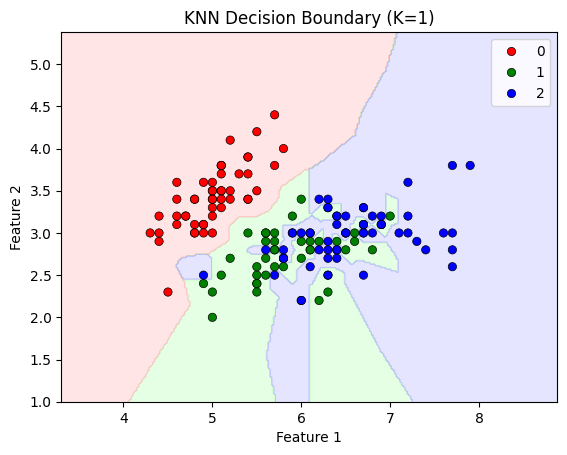

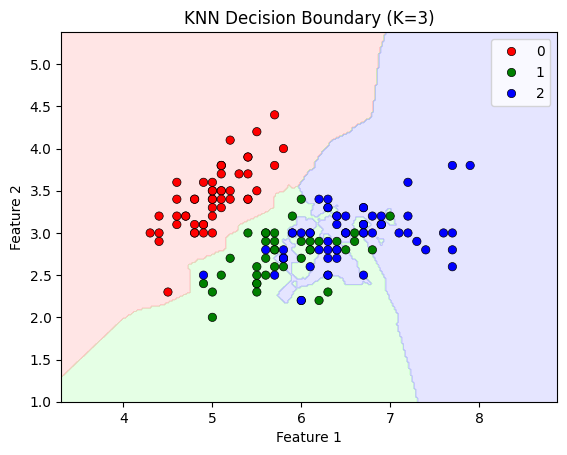

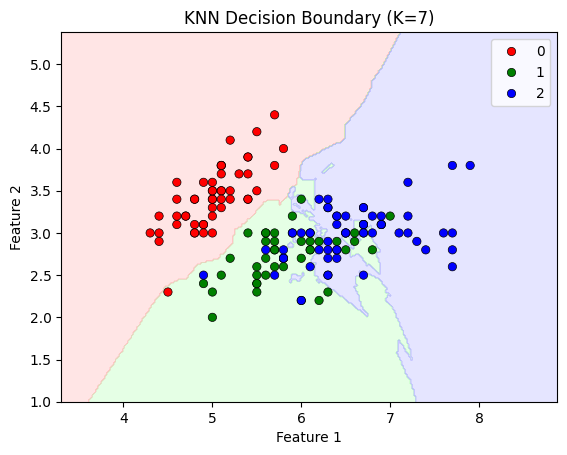

In [19]:
# 24. Train a KNN Classifier with different values of K and visualize decision boundaries
def plot_decision_boundaries(X, y, model, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=['red', 'green', 'blue'], edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

X_vis = X[:, :2]
for k in [1, 3, 7]:
    knn_vis = KNeighborsClassifier(n_neighbors=k)
    knn_vis.fit(X_vis, y)
    plot_decision_boundaries(X_vis, y, knn_vis, f"KNN Decision Boundary (K={k})")


In [20]:
# 25. Apply Feature Scaling before training a KNN model and compare results with unscaled data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
accuracy_scaled = accuracy_score(y_test, knn_scaled.predict(X_test_scaled))

print(f"Without Scaling Accuracy: {accuracy:.2f}, With Scaling Accuracy: {accuracy_scaled:.2f}")

Without Scaling Accuracy: 1.00, With Scaling Accuracy: 0.93


In [21]:
# 26. Train a PCA model on synthetic data and print the explained variance ratio for each component
X_synthetic, _ = make_regression(n_samples=200, n_features=5, noise=10, random_state=42)
pca = PCA(n_components=5)
pca.fit(X_synthetic)
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")


Explained Variance Ratio: [0.24505332 0.20890343 0.198169   0.18640823 0.16146602]


In [22]:

# 27. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA
pca_knn = PCA(n_components=2)
X_train_pca = pca_knn.fit_transform(X_train_scaled)
X_test_pca = pca_knn.transform(X_test_scaled)

knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)
accuracy_pca = accuracy_score(y_test, knn_pca.predict(X_test_pca))
print(f"Accuracy Without PCA: {accuracy_scaled:.2f}, Accuracy With PCA: {accuracy_pca:.2f}")

Accuracy Without PCA: 0.93, Accuracy With PCA: 0.93


In [23]:
# 28. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV
param_grid = {'n_neighbors': [1, 3, 5, 7, 9], 'metric': ['euclidean', 'manhattan', 'minkowski']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid_search.best_params_}, Best Score: {grid_search.best_score_:.2f}")

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5}, Best Score: 0.97


In [24]:
# 29. Train a KNN Classifier and check the number of misclassified samples
knn_best = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'], metric=grid_search.best_params_['metric'])
knn_best.fit(X_train_scaled, y_train)
y_pred_best = knn_best.predict(X_test_scaled)

misclassified_samples = (y_pred_best != y_test).sum()
print(f"Number of Misclassified Samples: {misclassified_samples}")

Number of Misclassified Samples: 2


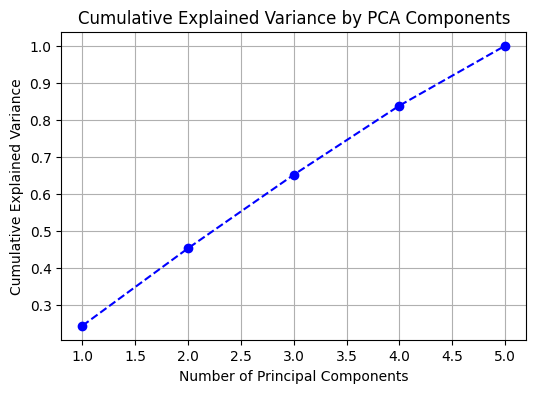

In [26]:
#30. Train a PCA model and visualize the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(6, 4))
plt.plot(range(1, 6), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

Uniform Weight Accuracy: 0.81, Distance Weight Accuracy: 0.81
MSE for different K values: {1: 314.4766162314697, 3: 236.59562405483047, 5: 275.9503187423206, 7: 288.5139370766725, 9: 323.8699060931672}
Missing values handled using KNN Imputation.


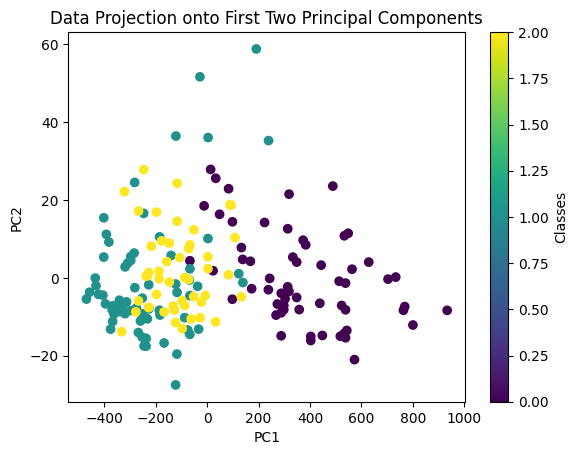

KD-Tree Accuracy: 0.81, Ball-Tree Accuracy: 0.81


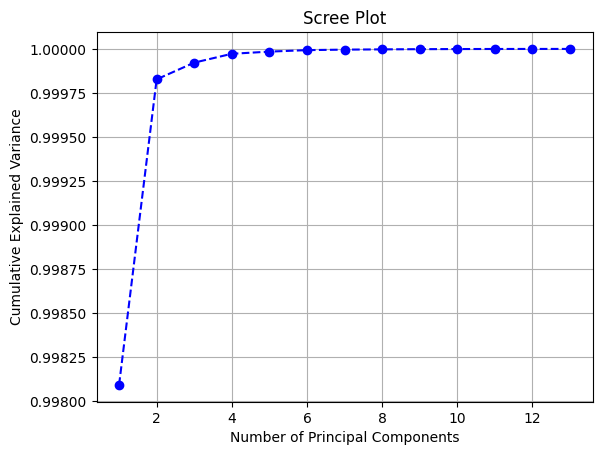

Precision: 0.81, Recall: 0.81, F1-Score: 0.81
Accuracy with 2 PCA components: 0.81
Accuracy with 5 PCA components: 0.81
Accuracy with 10 PCA components: 0.81
Accuracy with leaf_size 10: 0.81
Accuracy with leaf_size 30: 0.81
Accuracy with leaf_size 50: 0.81


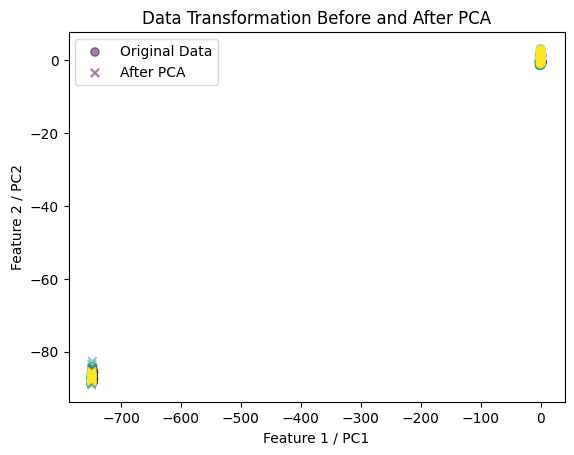

Classification Report for KNN on Wine Dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.77      0.71      0.74        14
           2       0.64      0.70      0.67        10

    accuracy                           0.81        36
   macro avg       0.80      0.80      0.80        36
weighted avg       0.81      0.81      0.81        36

MSE with euclidean metric: 275.95
MSE with manhattan metric: 275.95
MSE with minkowski metric: 275.95
ROC-AUC Score for KNN: 0.91


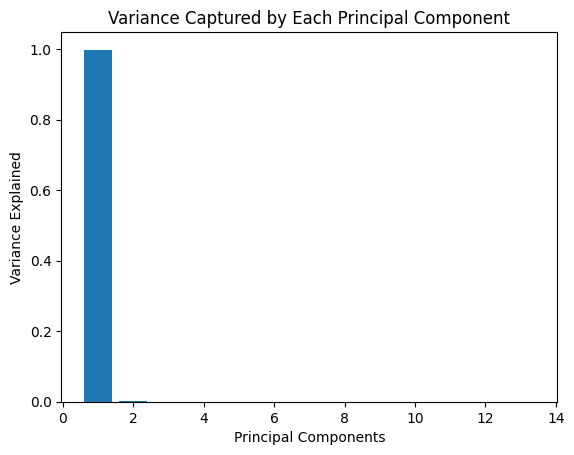

In [27]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine, make_regression
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, precision_recall_fscore_support, roc_auc_score
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# 31. Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy
wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uniform.fit(X_train, y_train)
accuracy_uniform = accuracy_score(y_test, knn_uniform.predict(X_test))

knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X_train, y_train)
accuracy_distance = accuracy_score(y_test, knn_distance.predict(X_test))

print(f"Uniform Weight Accuracy: {accuracy_uniform:.2f}, Distance Weight Accuracy: {accuracy_distance:.2f}")

# 32. Train a KNN Regressor and analyze the effect of different K values on performance
X_reg, y_reg = make_regression(n_samples=200, n_features=1, noise=10, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

mse_results = {}
for k in [1, 3, 5, 7, 9]:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train_reg, y_train_reg)
    mse_results[k] = mean_squared_error(y_test_reg, knn_reg.predict(X_test_reg))

print(f"MSE for different K values: {mse_results}")

# 33. Implement KNN Imputation for handling missing values in a dataset
X_missing = X.copy()
X_missing[np.random.randint(0, X.shape[0], 10), np.random.randint(0, X.shape[1], 10)] = np.nan
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X_missing)
print("Missing values handled using KNN Imputation.")

# 34. Train a PCA model and visualize the data projection onto the first two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Data Projection onto First Two Principal Components")
plt.colorbar(label="Classes")
plt.show()

# 35. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance
knn_kdtree = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
knn_kdtree.fit(X_train, y_train)
accuracy_kdtree = accuracy_score(y_test, knn_kdtree.predict(X_test))

knn_balltree = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knn_balltree.fit(X_train, y_train)
accuracy_balltree = accuracy_score(y_test, knn_balltree.predict(X_test))

print(f"KD-Tree Accuracy: {accuracy_kdtree:.2f}, Ball-Tree Accuracy: {accuracy_balltree:.2f}")

# 36. Train a PCA model on a high-dimensional dataset and visualize the Scree plot
pca_scree = PCA()
pca_scree.fit(X)
plt.plot(range(1, X.shape[1] + 1), np.cumsum(pca_scree.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

# 37. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score
y_pred_knn = knn_uniform.predict(X_test)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_knn, average='weighted')

print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

# 38. Train a PCA model and analyze the effect of different numbers of components on accuracy
for n in [2, 5, 10]:
    pca_n = PCA(n_components=n)
    X_train_pca_n = pca_n.fit_transform(X_train)
    X_test_pca_n = pca_n.transform(X_test)

    knn_pca_n = KNeighborsClassifier(n_neighbors=5)
    knn_pca_n.fit(X_train_pca_n, y_train)
    accuracy_pca_n = accuracy_score(y_test, knn_pca_n.predict(X_test_pca_n))

    print(f"Accuracy with {n} PCA components: {accuracy_pca_n:.2f}")

# 39. Train a KNN Classifier with different leaf_size values and compare accuracy
for leaf_size in [10, 30, 50]:
    knn_leaf = KNeighborsClassifier(n_neighbors=5, leaf_size=leaf_size)
    knn_leaf.fit(X_train, y_train)
    accuracy_leaf = accuracy_score(y_test, knn_leaf.predict(X_test))
    print(f"Accuracy with leaf_size {leaf_size}: {accuracy_leaf:.2f}")

# 40. Train a PCA model and visualize how data points are transformed before and after PCA
X_scaled = StandardScaler().fit_transform(X)
X_pca_transformed = pca_scree.transform(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, alpha=0.5, label="Original Data")
plt.scatter(X_pca_transformed[:, 0], X_pca_transformed[:, 1], c=y, alpha=0.5, marker="x", label="After PCA")
plt.legend()
plt.xlabel("Feature 1 / PC1")
plt.ylabel("Feature 2 / PC2")
plt.title("Data Transformation Before and After PCA")
plt.show()

# 41. Train a KNN Classifier on the Wine dataset and print classification report
knn_wine = KNeighborsClassifier(n_neighbors=5)
knn_wine.fit(X_train, y_train)
y_pred_wine = knn_wine.predict(X_test)

print("Classification Report for KNN on Wine Dataset:")
print(classification_report(y_test, y_pred_wine))

# 42. Train a KNN Regressor and analyze the effect of different distance metrics on prediction error
for metric in ["euclidean", "manhattan", "minkowski"]:
    knn_reg_metric = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn_reg_metric.fit(X_train_reg, y_train_reg)
    mse_metric = mean_squared_error(y_test_reg, knn_reg_metric.predict(X_test_reg))
    print(f"MSE with {metric} metric: {mse_metric:.2f}")

# 43. Train a KNN Classifier and evaluate using ROC-AUC score
y_proba_knn = knn_wine.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_proba_knn, multi_class="ovr")

print(f"ROC-AUC Score for KNN: {roc_auc:.2f}")

# 44. Train a PCA model and visualize the variance captured by each principal component
plt.bar(range(1, X.shape[1] + 1), pca_scree.explained_variance_ratio_)
plt.xlabel("Principal Components")
plt.ylabel("Variance Explained")
plt.title("Variance Captured by Each Principal Component")
plt.show()


KNN Accuracy after Feature Selection: 0.69
PCA Reconstruction Error: 0.4459


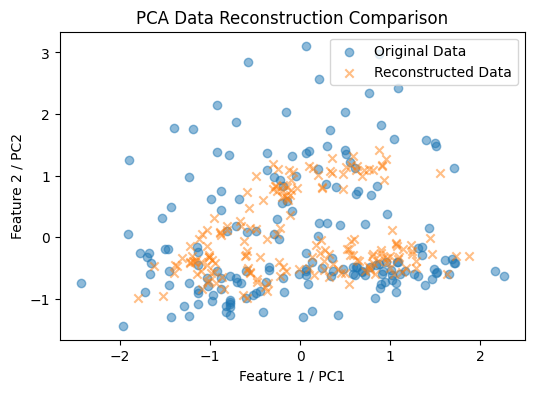

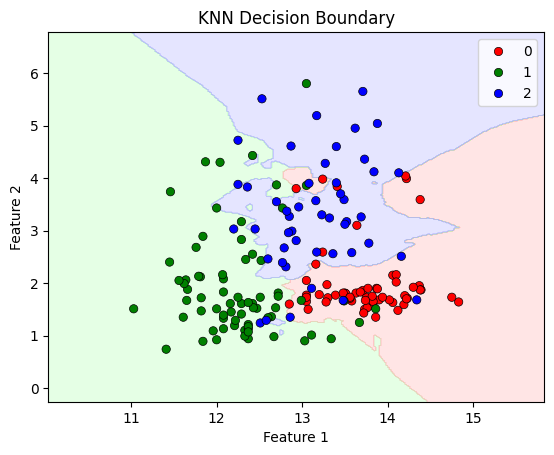

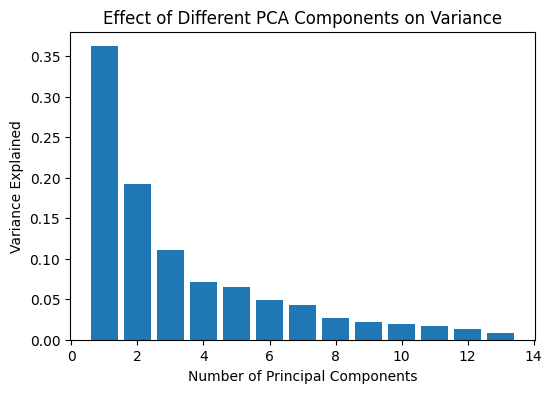

In [29]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from matplotlib.colors import ListedColormap




# 45. Train a KNN Classifier and perform feature selection before training
selector = SelectKBest(score_func=f_classif, k=2)  # Select best 2 features
X_selected = selector.fit_transform(X, y)
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

knn_selected = KNeighborsClassifier(n_neighbors=5)
knn_selected.fit(X_train_sel, y_train_sel)
accuracy_selected = knn_selected.score(X_test_sel, y_test_sel)

print(f"KNN Accuracy after Feature Selection: {accuracy_selected:.2f}")

# 46. Train a PCA model and visualize the data reconstruction error after reducing dimensions
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_reconstructed = pca.inverse_transform(X_pca)

reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
print(f"PCA Reconstruction Error: {reconstruction_error:.4f}")

# Visualizing reconstruction quality
plt.figure(figsize=(6, 4))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], label="Original Data", alpha=0.5)
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], label="Reconstructed Data", alpha=0.5, marker='x')
plt.xlabel("Feature 1 / PC1")
plt.ylabel("Feature 2 / PC2")
plt.title("PCA Data Reconstruction Comparison")
plt.legend()
plt.show()

# 47. Train a KNN Classifier and visualize the decision boundary
def plot_decision_boundaries(X, y, model, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=['red', 'green', 'blue'], edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

X_vis = X[:, :2]  # Using first two features for visualization
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_vis, y)

plot_decision_boundaries(X_vis, y, knn_vis, "KNN Decision Boundary")

# 48. Train a PCA model and analyze the effect of different numbers of components on data variance
pca_variance = PCA().fit(X_scaled)

plt.figure(figsize=(6, 4))
plt.bar(range(1, X.shape[1] + 1), pca_variance.explained_variance_ratio_)
plt.xlabel("Number of Principal Components")
plt.ylabel("Variance Explained")
plt.title("Effect of Different PCA Components on Variance")
plt.show()
